In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.feature_selection import RFE

## Logistic Regression

In [3]:
merged = pd.read_csv("Data Files/Postcoderemoteness_ato.csv")
merged.head()

,Unnamed: 0,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance,Remote
0,0,2000,25828,26186,-420,26811,280,22080,14998,8571,1219,1
1,1,2006,53192,69154,4148,54338,876,37440,37177,19577,19776,1
2,2,2007,31049,33284,-1654,32450,300,18532,8214,9233,4267,1
3,3,2008,40289,42505,-906,42123,392,18000,7579,10972,9029,1
4,4,2009,52414,56378,-1393,54867,567,23795,10851,15451,19841,1


In [4]:
merged = merged.loc[:, ~merged.columns.str.contains('^Unnamed')]
merged.head()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance,Remote
0,2000,25828,26186,-420,26811,280,22080,14998,8571,1219,1
1,2006,53192,69154,4148,54338,876,37440,37177,19577,19776,1
2,2007,31049,33284,-1654,32450,300,18532,8214,9233,4267,1
3,2008,40289,42505,-906,42123,392,18000,7579,10972,9029,1
4,2009,52414,56378,-1393,54867,567,23795,10851,15451,19841,1


In [5]:
# Examine the data: check number of rows and number of columns
merged.shape

(2357, 11)

In [6]:
# Look at the statistical summary of the dataframe
merged.describe()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance,Remote
count,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.00000,2357.000000,2357.00000,2357.000000
mean,4094.687739,41410.008061,45356.812049,-1033.533305,43776.069156,634.710649,32469.278744,19190.07255,9783.407297,44091.85490,0.407722
std,1482.579557,7391.189677,7631.006230,1564.036812,7683.724357,231.138550,10506.123057,9911.97319,2866.128784,14860.62324,0.491515
min,800.000000,18998.000000,21530.000000,-6387.000000,18998.000000,0.000000,4641.000000,0.00000,3238.000000,1219.00000,0.000000
25%,2850.000000,36427.000000,40000.000000,-2012.000000,38354.000000,466.000000,26308.000000,12688.00000,7683.000000,34999.00000,0.000000
50%,3870.000000,40900.000000,44998.000000,-938.000000,43195.000000,620.000000,30400.000000,16011.00000,9213.000000,42936.00000,0.000000
75%,5159.000000,46149.000000,50131.000000,-51.000000,48470.000000,761.000000,36128.000000,22884.00000,11426.000000,52057.00000,1.000000
max,7470.000000,67795.000000,72177.000000,4340.000000,70861.000000,1458.000000,103045.000000,90709.00000,20021.000000,95981.00000,1.000000


In [7]:
# Check how many classes we do have from the "remote" column
merged['Remote'].unique()

array([1, 0])

In [8]:
set(merged['Remote'])

{0, 1}

In [9]:
# Check number of samples for each class and comment whether dataset is balanced?
merged['Remote'].value_counts()

0    1396
1     961
Name: Remote, dtype: int64

In [10]:
# Deal with the NaN values in the data
merged.isna().sum()

Postcode                               0
Median taxable income or loss          0
Median salary and wages                0
Median net rent                        0
Median total income or loss            0
Median total deductions                0
Median total business income           0
Median total business expenses         0
Median net tax                         0
Median super total accounts balance    0
Remote                                 0
dtype: int64

In [11]:
# Split your data into training(80%) and testing data (20%) and use random_state=142

train, test = train_test_split(merged, test_size=0.2,random_state=142)
print(train.shape)
print(test.shape)

(1885, 11)
(472, 11)


In [12]:
# Build your Logistic Regression model

X_train = train.drop(['Postcode','Remote'], axis = 1)
y_train = train['Remote']
X_test = test.drop(['Postcode','Remote'], axis = 1)
y_test = test['Remote']

print(X_train.shape)

lr= LogisticRegression()
lr.fit(X_train, y_train)

(1885, 9)


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# Do predictions on test set + train set
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)


In [14]:
lr.predict_proba(X_test)

array([[9.72527126e-02, 9.02747287e-01],
       [1.22228781e-01, 8.77771219e-01],
       [7.20476907e-01, 2.79523093e-01],
       [4.97498208e-01, 5.02501792e-01],
       [8.42115927e-01, 1.57884073e-01],
       [7.42679483e-01, 2.57320517e-01],
       [8.71692229e-02, 9.12830777e-01],
       [8.68257347e-01, 1.31742653e-01],
       [9.70868842e-01, 2.91311582e-02],
       [1.49370183e-01, 8.50629817e-01],
       [9.91905394e-01, 8.09460603e-03],
       [8.96142941e-01, 1.03857059e-01],
       [1.99018084e-01, 8.00981916e-01],
       [9.78594809e-01, 2.14051905e-02],
       [4.26078173e-01, 5.73921827e-01],
       [9.64057003e-01, 3.59429966e-02],
       [3.96273264e-01, 6.03726736e-01],
       [2.58661321e-01, 7.41338679e-01],
       [9.90385587e-01, 9.61441334e-03],
       [8.84474990e-01, 1.15525010e-01],
       [7.99876746e-01, 2.00123254e-01],
       [1.71030705e-01, 8.28969295e-01],
       [7.43904349e-01, 2.56095651e-01],
       [9.62067268e-01, 3.79327320e-02],
       [7.060302

In [15]:
# Evaluate the performance of your trained model
print("Train Accuracy: ")
print(accuracy_score(y_train, train_preds))

print("Test Accuracy:")
print(accuracy_score(y_test, test_preds))

Train Accuracy: 
0.8604774535809019
Test Accuracy:
0.8622881355932204


In [16]:
#confusion matrix

print("Train confusion matrix")
print(confusion_matrix(y_train, train_preds))
print("Test confusion matrix")
print(confusion_matrix(y_test, test_preds))

Train confusion matrix
[[960 159]
 [104 662]]
Test confusion matrix
[[238  39]
 [ 26 169]]


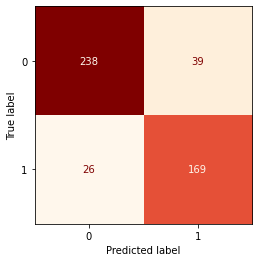

In [17]:
plot_confusion_matrix(lr, X_test, y_test, cmap="OrRd", colorbar=False)

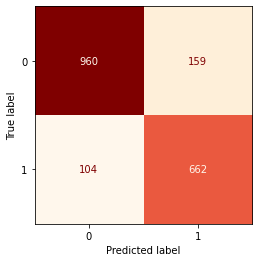

In [18]:
plot_confusion_matrix(lr, X_train, y_train, cmap="OrRd", colorbar=False)

## RFE 

In [23]:
lr = LogisticRegression()
rfe = RFE(estimator = lr, n_features_to_select = 5, step =1)
rfe.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [28]:
X_train.columns

Index(['Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance'],
      dtype='object')

In [29]:
rfe.ranking_

array([1, 4, 2, 1, 1, 3, 1, 1, 5])

In [30]:
X_train.columns[rfe.support_]

Index(['Median taxable income or loss', 'Median total income or loss',
       'Median total deductions', 'Median total business expenses',
       'Median net tax'],
      dtype='object')

In [31]:
train_rfe_preds = rfe.predict(X_train)
test_rfe_preds = rfe.predict(X_test)

print("Train Accuracy: ")
print(accuracy_score(y_train, train_rfe_preds))

print("Test Accuracy:")
print(accuracy_score(y_test, test_rfe_preds))

Train Accuracy: 
0.8286472148541114
Test Accuracy:
0.798728813559322


In [32]:
train_accuracies = []
test_accuracies = []

for i in range(1, X_train.shape[1]+1):
    lr = LogisticRegression()
    rfe = RFE(estimator = lr, n_features_to_select = i, step =1)
    rfe.fit(X_train, y_train) 
    
    train_rfe_preds = rfe.predict(X_train)
    test_rfe_preds = rfe.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, train_rfe_preds))
    test_accuracies.append(accuracy_score(y_test, test_rfe_preds))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Text(0, 0.5, 'Accuracy')

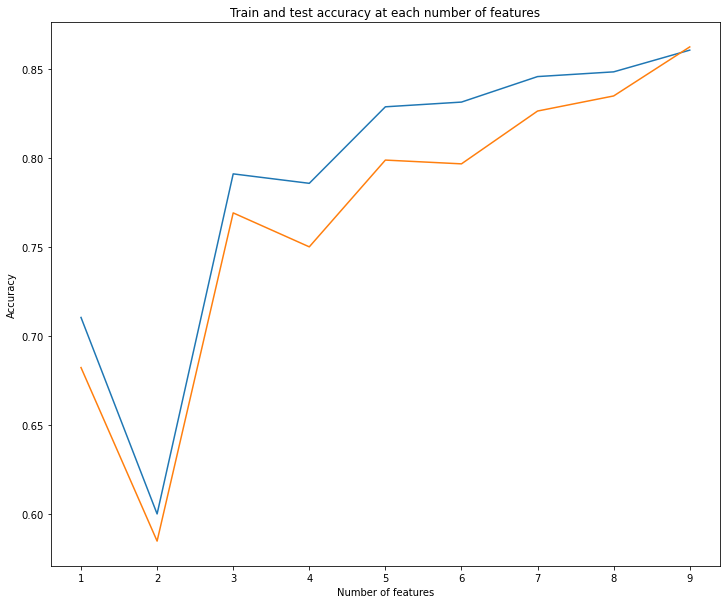

In [33]:
plt.figure(figsize=(12,10))
plt.plot(range(1, X_train.shape[1]+1), train_accuracies)
plt.plot(range(1, X_test.shape[1]+1), test_accuracies)
plt.title("Train and test accuracy at each number of features")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")

In [34]:
lr = LogisticRegression()
rfe = RFE(estimator = lr, n_features_to_select =1, step =1)
rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Index(['Median total deductions'], dtype='object')